In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#2. Load the dataset


In [4]:
omi=pd.read_csv("/content/abalone - abalone.csv")

# 3. Perform Below Visualizations

#a) Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


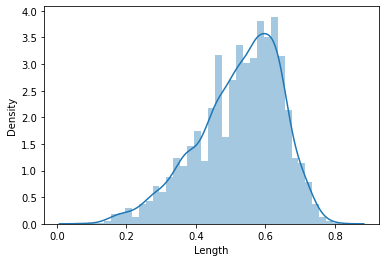

In [6]:
sns.distplot(omi['Length'])

#b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


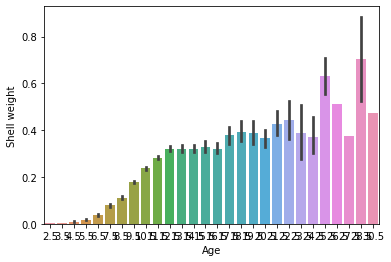

In [7]:
sns.barplot(omi['Age'],omi['Shell weight'])

# c)Multi - Variate Analysis

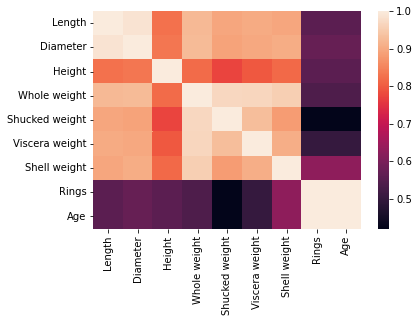

In [8]:
sns.heatmap(omi.corr())

# 4. Perform descriptive statistics on the dataset

In [10]:
omi.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


#5. Check for Missing values and deal with them.

In [11]:
omi.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

# 6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


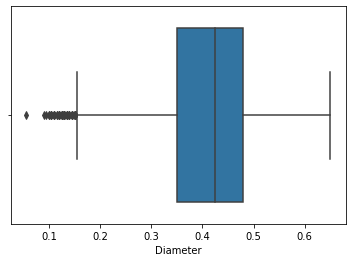

In [13]:

sns.boxplot(omi['Diameter'])

In [14]:
q=omi.quantile([0.75,0.25])
q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0,12.5
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0,9.5


In [15]:
iqr=q.iloc[0]-q.iloc[1]
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
Age               3.0000
dtype: float64

In [16]:
u=q.iloc[0]+(1.5*iqr)
u

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
Age               17.00000
dtype: float64

In [17]:
l=q.iloc[1]-(1.5*iqr)
l

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
Age               5.00000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


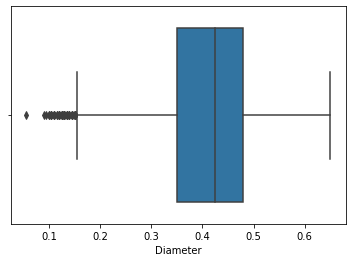

In [18]:
omi['Diameter']=np.where(omi['Diameter']>10,7,omi['Diameter'])
sns.boxplot(omi['Diameter'])

#7. Check for Categorical columns and perform encoding.


In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
omi['Sex']=le.fit_transform(omi['Sex'])
omi.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


# 8. Split the data into dependent and independent variables

In [20]:
x=omi.iloc[:,0:6]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight
0,2,0.455,0.365,0.095,0.5140,0.2245
1,2,0.350,0.265,0.090,0.2255,0.0995
2,0,0.530,0.420,0.135,0.6770,0.2565
3,2,0.440,0.365,0.125,0.5160,0.2155
4,1,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700
4173,2,0.590,0.440,0.135,0.9660,0.4390
4174,2,0.600,0.475,0.205,1.1760,0.5255
4175,0,0.625,0.485,0.150,1.0945,0.5310


In [21]:
y=omi['Age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

# 9. Scale the independent variables

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=StandardScaler()
x_scale=s.fit_transform(x)
x_scale


array([[ 1.15198011, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536],
       [ 1.15198011, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984],
       [-1.28068972,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 ],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943,  1.56576738,  0.70821206,
         0.74855917],
       [-1.28068972,  0.84118198,  0.77718745,  0.25067161,  0.54199757,
         0.77334105],
       [ 1.15198011,  1.54905203,  1.48263359,  1.32665906,  2.28368063,
         2.64099341]])

# 10. Split the data into training and testing


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=0)
x_train

array([[ 1.15198011,  0.79954256,  1.0291325 ,  0.84844242,  0.92337314,
         0.95582578],
       [-0.0643548 , -1.49062526, -1.54070702, -1.30353247, -1.28126314,
        -1.14612796],
       [-0.0643548 , -1.24078877, -1.33915098, -1.06442415, -1.22211934,
        -1.19118592],
       ...,
       [ 1.15198011,  0.59134549,  0.42446438,  0.13111745,  0.26565325,
         0.46694694],
       [-1.28068972,  0.84118198,  0.82757646,  0.6093341 ,  0.60827942,
         0.53002808],
       [-0.0643548 , -0.94931287, -0.83526087, -0.70576167, -1.02531323,
        -1.02221858]])

In [24]:
x_train.shape

(2923, 6)

In [25]:
x_test

array([[ 1.15198011,  0.21659075,  0.17251933,  0.37022577,  0.18101643,
        -0.36887819],
       [-0.0643548 , -0.1998034 , -0.07942572, -0.46665335, -0.43387519,
        -0.44322382],
       [ 1.15198011,  0.79954256,  0.72679844,  0.37022577,  0.87034766,
         0.75531787],
       ...,
       [-1.28068972,  0.92446081,  0.87796547, -2.97729071,  0.66844295,
         0.68547803],
       [ 1.15198011,  1.13265788,  0.97874349,  1.44621322,  1.63513823,
         0.57283314],
       [-0.0643548 ,  0.79954256,  0.77718745,  0.72888826,  0.77347419,
         0.54579836]])

In [26]:
x_test.shape

(1254, 6)

In [28]:
y_train

1376    11.5
1225     6.5
2722     8.5
3387    19.5
2773    12.5
        ... 
1033    11.5
3264    13.5
1653    11.5
2607    10.5
2732     9.5
Name: Age, Length: 2923, dtype: float64

In [29]:
y_test

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
        ... 
1052    13.5
3439     9.5
1174    10.5
2210    19.5
2408    16.5
Name: Age, Length: 1254, dtype: float64

# 11.Build a model

#12.Train the model

In [30]:
from sklearn.preprocessing import PolynomialFeatures
a=PolynomialFeatures(degree=4)
data=a.fit_transform(x)
data

array([[1.00000000e+00, 2.00000000e+00, 4.55000000e-01, ...,
        1.33155444e-02, 5.81583605e-03, 2.54018520e-03],
       [1.00000000e+00, 2.00000000e+00, 3.50000000e-01, ...,
        5.03430188e-04, 2.22134384e-04, 9.80149501e-05],
       [1.00000000e+00, 0.00000000e+00, 5.30000000e-01, ...,
        3.01544962e-02, 1.14248571e-02, 4.32862016e-03],
       ...,
       [1.00000000e+00, 2.00000000e+00, 6.00000000e-01, ...,
        3.81909168e-01, 1.70657541e-01, 7.62589606e-02],
       [1.00000000e+00, 0.00000000e+00, 6.25000000e-01, ...,
        3.37769611e-01, 1.63869953e-01, 7.95020055e-02],
       [1.00000000e+00, 2.00000000e+00, 7.10000000e-01, ...,
        3.39409416e+00, 1.64696743e+00, 7.99182808e-01]])

In [31]:
from sklearn.linear_model import LinearRegression
pq=LinearRegression()
pq.fit(x_train,y_train)

LinearRegression()

# 13.Test the model






In [32]:
pq.predict(x_test)

array([14.85332038, 11.20930496, 13.25542443, ..., 11.24666242,
       19.13299563, 13.97360659])

In [33]:
y_test #evaluation

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
        ... 
1052    13.5
3439     9.5
1174    10.5
2210    19.5
2408    16.5
Name: Age, Length: 1254, dtype: float64